In [2]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import math

In [3]:
dataset = np.load("../data/formatted/dataset.npy", allow_pickle=True)

In [4]:
#Extract all styles
styles = []
for element in dataset:
    styles.append(element[1])
    
print("Number of styles: ", (set(styles)))

Number of styles:  {'Mambo', 'Latin', 'Hymn', 'Disco', 'Son', 'Frevo', 'Ballad', 'Medium Shuffle', 'Afro', 'Bossa', 'Cha Cha', 'Samba', 'Even 8ths', 'Shuffle', 'Power Ballad', 'Rock', 'Maxixe', 'Marchinha', 'Pop', 'Slowly', 'Medium Ballad', 'Gypsy Waltz', 'Jazz', 'Even 16ths', 'Med Up Latin', 'Bolero-Cha', 'Folk', 'Merengue', 'Slow Shuffle', 'Musical', 'Gospel Ballad', 'Medium Country', 'Montuno', 'Gary Aprile', '128 Feel', 'Soul', 'RnB', 'Up Waltz (One Feel)', 'Afoxé', 'Chacarera', 'March', 'Moderate Latin', 'Blues', 'Foxtrot', 'Gospel', 'Choro', 'Salsa', 'Up Tempo', 'Medium Up', 'Baião', 'Dreamlike', 'Reggae', 'Bolero', 'Forró', 'Slow Ballad', 'Medium Waltz', 'Country Ballad', 'Waltz', 'Tango', 'Medium Slow', 'Calypso', 'Funk'}


In [11]:
styleCount = {}
for style in styles:   
    styleCount[style] = styleCount.get(style, 0) + 1

styleCount = sorted(styleCount.items(), key = lambda kv: -kv[1])
styleCount = np.array(styleCount, dtype=object)

In [6]:
print("Style count: ", styleCount)

Style count:  [['Jazz' 18576]
 ['Samba' 7740]
 ['Ballad' 5220]
 ['Rock' 3660]
 ['Bossa' 2244]
 ['Pop' 1908]
 ['Waltz' 1872]
 ['Funk' 1020]
 ['Blues' 876]
 ['Latin' 864]
 ['Even 8ths' 756]
 ['Gospel' 708]
 ['Soul' 492]
 ['Bolero' 276]
 ['RnB' 180]
 ['Afoxé' 180]
 ['Folk' 132]
 ['Disco' 96]
 ['Tango' 96]
 ['Gypsy Waltz' 96]
 ['Afro' 84]
 ['Baião' 84]
 ['Son' 72]
 ['Shuffle' 60]
 ['Reggae' 60]
 ['Hymn' 48]
 ['Choro' 48]
 ['Medium Shuffle' 48]
 ['Bolero-Cha' 36]
 ['Marchinha' 36]
 ['Country Ballad' 36]
 ['Medium Ballad' 36]
 ['Medium Waltz' 24]
 ['Medium Slow' 24]
 ['March' 24]
 ['Slow Ballad' 24]
 ['Montuno' 24]
 ['Salsa' 24]
 ['Medium Country' 12]
 ['Foxtrot' 12]
 ['Med Up Latin' 12]
 ['Merengue' 12]
 ['Cha Cha' 12]
 ['Slow Shuffle' 12]
 ['Frevo' 12]
 ['Slowly' 12]
 ['Chacarera' 12]
 ['128 Feel' 12]
 ['Calypso' 12]
 ['Up Tempo' 12]
 ['Dreamlike' 12]
 ['Mambo' 12]
 ['Gary Aprile' 12]
 ['Musical' 12]
 ['Power Ballad' 12]
 ['Medium Up' 12]
 ['Gospel Ballad' 12]
 ['Up Waltz (One Feel)' 12]
 

/tmp/ipykernel_764865/3126498820.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  b = sns.barplot(x=key, y=value, palette="rainbow")
/tmp/ipykernel_764865/3126498820.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b.set_xticklabels(b.get_xticklabels(), rotation=45, horizontalalignment='right')


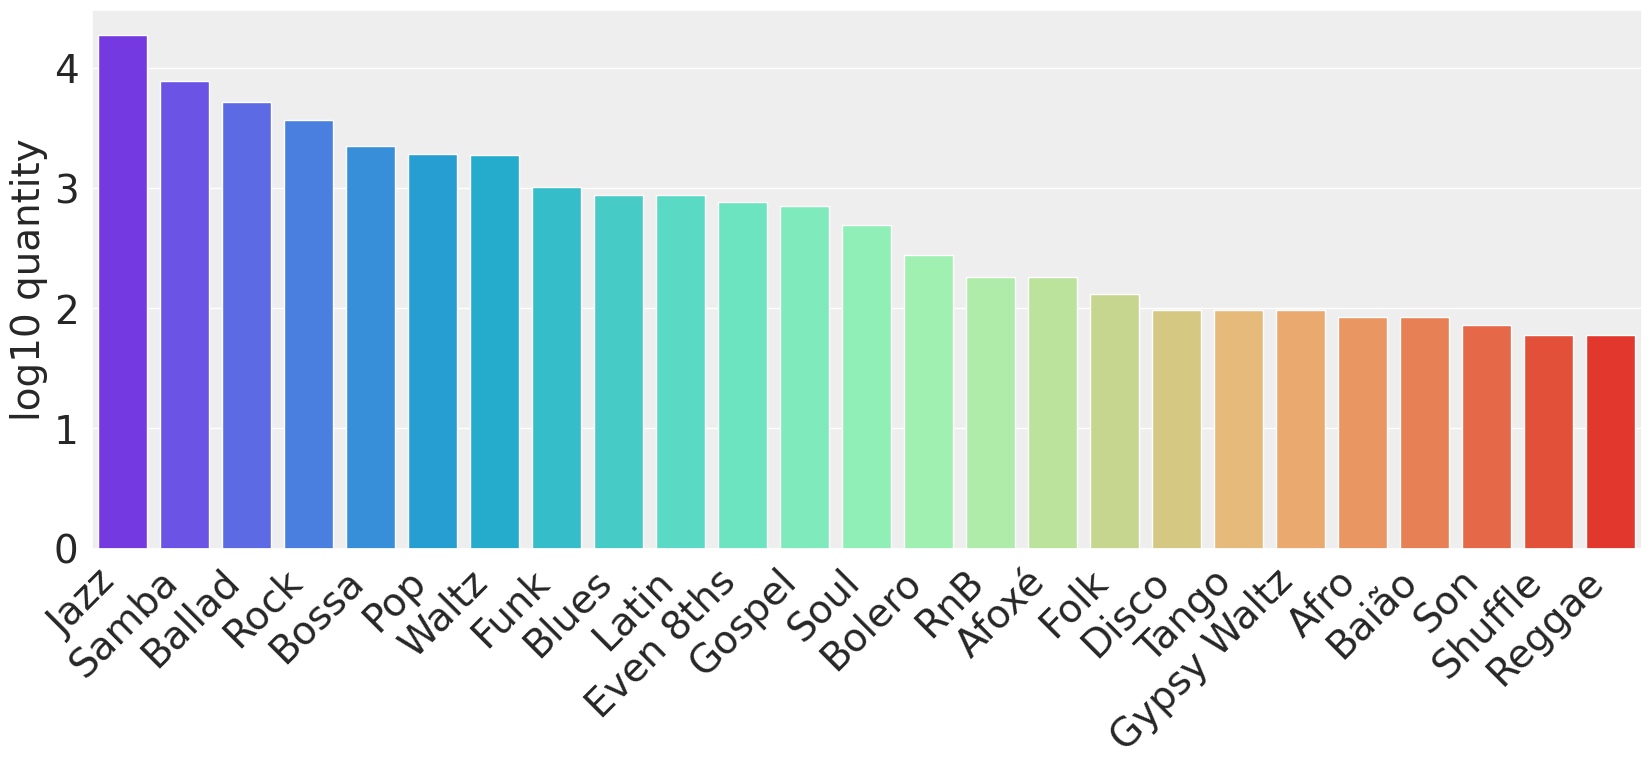

In [13]:
result = []
for i in range(25):
    result.append(styleCount[i])
    
sns.set(rc={'figure.figsize':(20,7)})
sns.set(font_scale=0.8)
sns.set(rc={'axes.facecolor':'#eee', 'figure.facecolor':'white'})

styleCount = np.array(styleCount, dtype=object)
    
key = []
value = []
for element in result:
    val = math.log10(element[1])
    value.append(val)
    key.append(element[0])
    
b = sns.barplot(x=key, y=value, palette="rainbow") 
b.axes.set_title("",fontsize=16)
b.set_xlabel("",fontsize=16)
b.set_xticklabels(b.get_xticklabels(), rotation=45, horizontalalignment='right')
b.set_ylabel("log10 quantity",fontsize=28)
b.tick_params(labelsize=28)
plt.show()
